# Ciencia de datos
## Práctica 5. Pruebas estadísticas
### Alberto Benavides

En esta práctica interesa conocer cómo afectan las características a los agrupamientos dados por $k$-medias. Primero se parte del conjunto de datos preprocesado al que se le asocia el grupo asignado por el algoritmo

In [179]:
import pandas as pd

data2 = pd.read_csv("D:/FIME/Epidemia/Data/semanalesTodasKmeans.csv")
print(data2.sample(3))

            m        f1        f2        f3        f4       ac1       ac2  \
120 -0.000217  0.018519  0.055556  0.277778  0.240741  0.575058  0.429026   
105 -0.000006  0.018519  0.351852  0.055556  0.148148  0.349336  0.340857   
23  -0.000007  0.055556  0.462963  0.222222  0.481481  0.125254  0.139100   

          ac4       ac8      ac16      ac32                               enf  \
120  0.280800  0.092369 -0.075860 -0.129966                          OBESIDAD   
105  0.160919  0.174492 -0.055807 -0.069355           ENFERMEDAD DE PARKINSON   
23   0.033382 -0.241587 -0.003075  0.123545  ENFERMEDAD ISQUEMICA DEL CORAZON   

    cie  cluster  
120   E        1  
105   G        1  
23    I        0  


Ahora revisamos si hay diferencias entre las características y el cluster asignado por medio de la prueba Kruskal-Wallis

In [180]:
from scipy.stats import kruskal #shapiro, mannwhitneyu, wilcoxon

for param in data2:
    if param == 'enf':
        break
    if kruskal(data2[param], data2.cluster)[1] > 0.01:
        print("No tienen diferencia con {}".format(param))
    else:
        print("Tienen diferencia con {}".format(param))

Tienen diferencia con m
Tienen diferencia con f1
Tienen diferencia con f2
Tienen diferencia con f3
Tienen diferencia con f4
Tienen diferencia con ac1
Tienen diferencia con ac2
Tienen diferencia con ac4
Tienen diferencia con ac8
Tienen diferencia con ac16
Tienen diferencia con ac32


Vemos que sí hay diferencias con todas las características, por lo que todas las características afectan al agrupamiento asignado. Sin embargo, cabe recordar que el cluster asignado no tiene diferencias con el grupo de la CIE a la que pertenece la enfermedad, salvo con $\alpha >= 0.1$ 

In [181]:
classnames, indices = np.unique(data2.cie, return_inverse=True)
for a in [0.01, 0.05, 0.1, 0.15]:
    if kruskal(indices, data2.cluster)[1] > a:
        print("No tienen diferencia con {}, alpha = {}".format(param, a))
    else:
        print("Tienen diferencia con {}, alpha = {}".format(param, a))

No tienen diferencia con enf, alpha = 0.01
No tienen diferencia con enf, alpha = 0.05
No tienen diferencia con enf, alpha = 0.1
No tienen diferencia con enf, alpha = 0.15


Ahora se analizan las relaciones lineales que guarda cada característica con los agrupamientos, para ello se comparan las características de cada registro del conjunto de datos procesado, con el orden en que están distanciados los centroides del origen.

[1. 3. 7. 6. 0. 4. 5. 2.]
y = f(x) = -835.0153 x + 2.5694
error 377.5120552858745
valor p 0.028776832550025062
pendiente significativo
R^2 0.037377697304926426


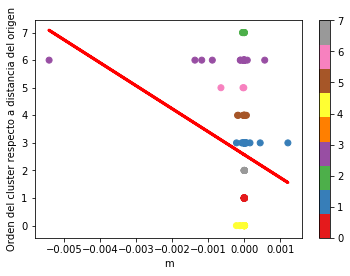

y = f(x) = -4.0803 x + 2.9637
error 1.5575994338248875
valor p 0.00988389796752813
pendiente significativo
R^2 0.05165046223041006


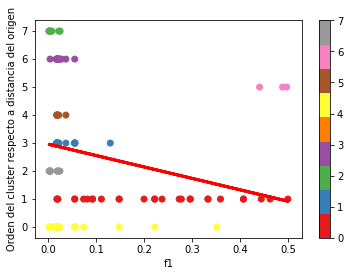

y = f(x) = -4.6554 x + 3.1743
error 1.4366321321792088
valor p 0.0015265124402572938
pendiente significativo
R^2 0.07692770797104344


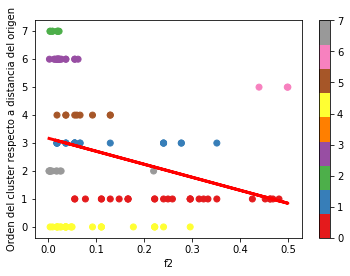

y = f(x) = -2.3421 x + 2.9712
error 1.3099351492798574
valor p 0.07618944686083065
pendiente no significativo
R^2 0.02474307404728114


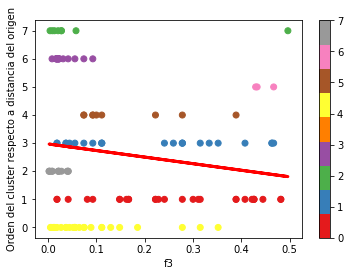

y = f(x) = -5.1026 x + 3.5524
error 1.2640652439163913
valor p 9.349856502498195e-05
pendiente significativo
R^2 0.11451241210538779


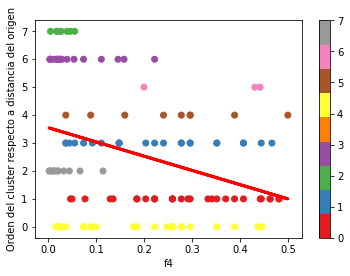

y = f(x) = 4.5207 x + 0.8057
error 0.43090402691782365
valor p 6.843308222098536e-19
pendiente significativo
R^2 0.466246175138578


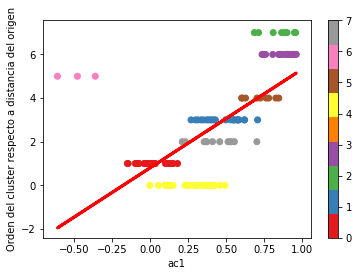

y = f(x) = 6.7588 x + 0.1629
error 0.3210159181370664
valor p 4.384930097543234e-43
pendiente significativo
R^2 0.7786686471371516


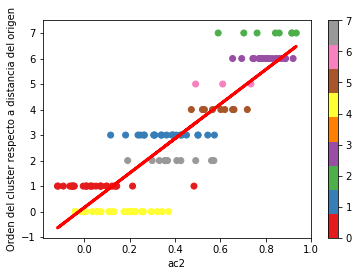

y = f(x) = 7.5550 x + 0.5737
error 0.3119894723321978
valor p 3.1207756571441934e-49
pendiente significativo
R^2 0.8231324739063729


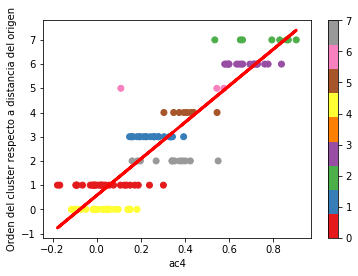

y = f(x) = 7.2018 x + 1.7088
error 0.5360955440510807
valor p 4.411926102278686e-26
pendiente significativo
R^2 0.5888640939554781


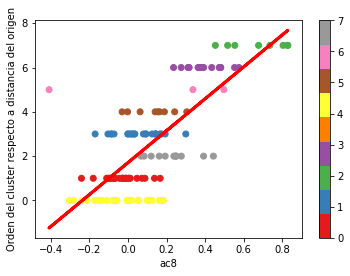

y = f(x) = 3.9581 x + 2.4883
error 0.9607278339909997
valor p 6.815182771076217e-05
pendiente significativo
R^2 0.11872009725412792


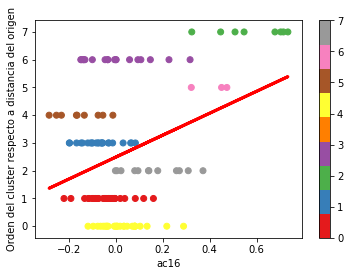

y = f(x) = 3.5894 x + 2.6189
error 1.0900378863724698
valor p 0.0012871632627034797
pendiente significativo
R^2 0.07923792582422896


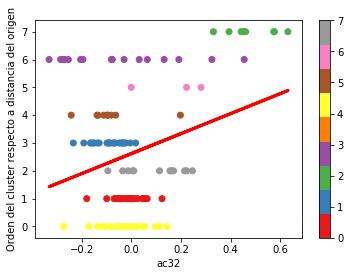

In [199]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
# https://stackoverflow.com/a/17682382
import matplotlib.cm as cm
from scipy import stats
import numpy as np

clusterCenters = pd.read_csv("D:/FIME/Epidemia/Data/KmeansClusters.csv", header=None)

clustDist =[]
zero = np.array([0,0,0,0,0,0,0,0,0,0,0])

# https://stackoverflow.com/a/16476974
for index, row in clusterCenters.iterrows():
    # https://stackoverflow.com/a/1401828
    clustDist.append(np.linalg.norm(zero-row))

clustDist = np.array(clustDist)
cs = np.sort(clustDist)

for i in range(len(clustDist)):
    for j in range(len(clustDist)):
        if clustDist[i] == cs[j]:
            clustDist[i] = j
            
print(clustDist)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html
data2 = data2.assign(clusterDistance = lambda x: clustDist[x.cluster])
    
for param in data2:
    if param == 'enf':
        break
    a, b, r, p, e = stats.linregress(data2[param], data2.clusterDistance)
    print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
    print("error", e)
    print("valor p", p)
    print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
    print("R^2", r**2)

    plt.plot(data2[param], (a * data2[param] + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'red', linewidth = 3)
    plt.scatter(data2[param], data2.clusterDistance, c= data2.cluster, cmap=cm.Set1)
    #plt.legend(loc='upper left')
    plt.colorbar()
    plt.xlabel(param)
    plt.ylabel('Orden del cluster respecto a distancia del origen')
    plt.savefig("P6/{}.png".format(param))
    plt.show()

Con esto se ve que en todos los casos se halla error. Sin embargo, de entre todos los valores, el que más error produce es la pendiente ($m$), lo que coincide con la reducción de características que se hizo en la práctica 4. 

Estos errores pueden provenir del hecho de que los clusters son sólo asignaciones numéricas a puntos en el espacio. De todas formas, al ordenarlos con base en las distancias con que están separados sus centroides del origen, se obtienen mejores resultados.

El mejor ajuste lo logra la autocorrelación con retraso de 4 semanas, quizás debido a que haya patrones mensuales de consulta o aparición de enfermedades. A partir de dicha característica, se generan algunas predicciones.

In [216]:
for i in np.arange(-0.4, 0.8, 0.1):
    print("Con una autocorrelación de {:.1f} se pertenecería al cluster {}".format(i, max(0, round(7.5550 * i + 0.5737))))

Con una autocorrelación de -0.4 se pertenecería al cluster 0
Con una autocorrelación de -0.3 se pertenecería al cluster 0
Con una autocorrelación de -0.2 se pertenecería al cluster 0
Con una autocorrelación de -0.1 se pertenecería al cluster 0
Con una autocorrelación de -0.0 se pertenecería al cluster 1.0
Con una autocorrelación de 0.1 se pertenecería al cluster 1.0
Con una autocorrelación de 0.2 se pertenecería al cluster 2.0
Con una autocorrelación de 0.3 se pertenecería al cluster 3.0
Con una autocorrelación de 0.4 se pertenecería al cluster 4.0
Con una autocorrelación de 0.5 se pertenecería al cluster 4.0
Con una autocorrelación de 0.6 se pertenecería al cluster 5.0
Con una autocorrelación de 0.7 se pertenecería al cluster 6.0
Con una autocorrelación de 0.8 se pertenecería al cluster 7.0
